In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.35   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       

In [2]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(scDblFinder)
    library(scCustomize)
})

In [3]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

## Load Data

In [6]:
homo = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_homo.rds'
        )
)
hemi = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_hemi.rds'
        )
)
tumor.int = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/data/dong_et_al/20240901_6_sample_tumor_int.rds')

human_meta = read.csv('../human_homo_hemi_metadata/tumor_metadata.csv')
homo_meta = read.csv('../human_homo_hemi_metadata/homo_metadata.csv')
hemi_meta = read.csv('../human_homo_hemi_metadata/hemi_metadata.csv')
hemi@meta.data$annot.new = hemi_meta$annot.new
homo@meta.data$annot.new = homo_meta$annot.new
all_cell_types = union(union(
   unique(tumor.int$annot),
   unique(homo$annot.new)
    ),
   unique(hemi$annot.new)
)
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)
#color.list = hue_pal()(15)
names(color.list) = all_cell_types

## Figure 1C Homozygous TH-MYCN (n=5) Hemizygous TH-MYCN (n=5)

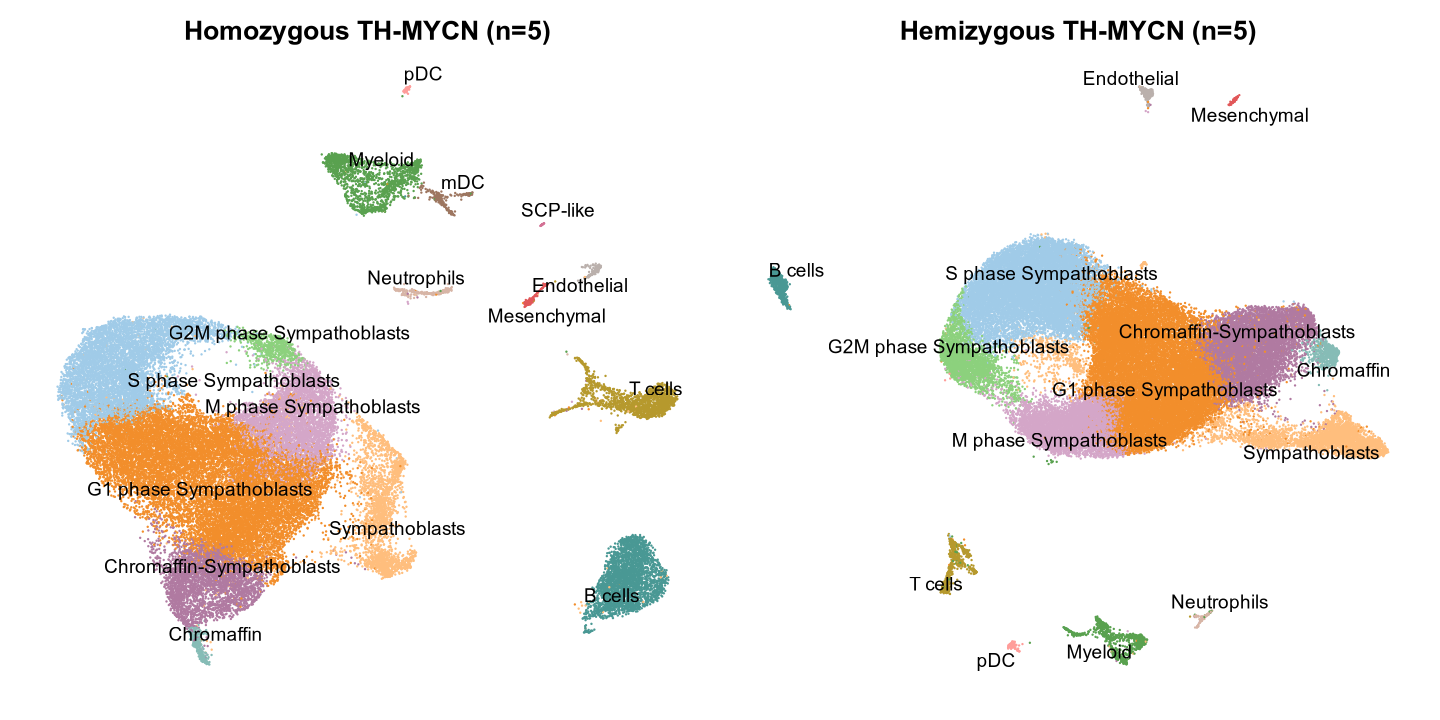

In [11]:
fig.size(6,12)

p.homo = DimPlot(homo, label=T, reduction="umap", group.by="annot.new",repel = T)+scale_color_manual(values = color.list) + ggtitle("Homozygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.hemi = DimPlot(hemi, label=T, reduction="umap", group.by="annot.new",repel=T)+scale_color_manual(values = color.list) + ggtitle("Hemizygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.homo | p.hemi

## Figure 1D

In [24]:
dotplot.sig.df = openxlsx::read.xlsx(
    '../20240805_Figure1C_Dotplot_5-Homozygous_Samples.xlsx',
    sheet ="Dotplot"
)
homo$annot = factor(
    homo$annot, levels=na.omit(dotplot.sig.df$Annotation)) 

In [48]:
factor(homo$annot.new) %>% levels

[1] "B cells"                   "Chromaffin"               
 [3] "Chromaffin-Sympathoblasts" "Endothelial"              
 [5] "G1 phase Sympathoblasts"   "G2M phase Sympathoblasts" 
 [7] "M phase Sympathoblasts"    "mDC"                      
 [9] "Mesenchymal"               "Myeloid"                  
[11] "Neutrophils"               "pDC"                      
[13] "S phase Sympathoblasts"    "SCP-like"                 
[15] "Sympathoblasts"            "T cells"

In [27]:
homo$annot %>% levels

[1] "Sympathoblasts"            "S phase Sympathoblasts"   
 [3] "G2M phase Sympathoblasts"  "M phase Sympathoblasts"   
 [5] "Chromaffin-Sympathoblasts" "Chromaffin cells"         
 [7] "NCC/Schwannian"            "Mesenchymal cells"        
 [9] "Endothelial cells"         "B cells"                  
[11] "T cells"                   "Myeloid cells"            
[13] "Neutrophils"               "mDC"                      
[15] "pDC"

In [28]:
dotplot.sig.df$Gene %>% rev

[1] "Siglech" "Clec10a" "Syngr2"  "S100a8"  "S100a9"  "Clec4a3" "Cd68"   
 [8] "Klre1"   "Ncr1"    "Xcl1"    "Trbc2"   "Trac"    "Cd3d"    "Ighd"   
[15] "Ms4a1"   "Cd79a"   "Gpihbp1" "Emcn"    "Cdh5"    "Prrx1"   "Col1a1" 
[22] "Mgp"     "Th"      "Cdkn1c"  "Caly"    "Chga"    "Kif20b"  "Aspm"   
[29] "Nusap1"  "Prc1"    "Cdk1"    "Ube2c"   "Cenpa"   "Top2a"   "Rrm2"   
[36] "Phox2b"  "Nefl"    "Cdc20"   "Isl1"    "Stmn1"   "MYCN"

In [34]:
rownames(homo) %>%head

[1] "MYCN"    "Xkr4"    "Gm1992"  "Gm37381" "Rp1"     "Sox17"

In [38]:
fig.size(20,8)
DotPlot(
        homo, 
        assay='RNA',
        features = rownames(GetAssayData(homo, assay = "RNA")) %>% head, 
        group.by='annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

ERROR: Error in `$<-.data.frame`(`*tmp*`, "id", value = NA_character_): replacement has 1 row, data has 0


In [37]:
rownames(GetAssayData(homo, assay = "RNA")) %>% head

[1] "MYCN"    "Xkr4"    "Gm1992"  "Gm37381" "Rp1"     "Sox17"

In [40]:
table(homo$annot)


           Sympathoblasts    S phase Sympathoblasts  G2M phase Sympathoblasts 
                    18216                      6918                       709 
   M phase Sympathoblasts Chromaffin-Sympathoblasts          Chromaffin cells 
                     4485                      3426                       341 
           NCC/Schwannian         Mesenchymal cells         Endothelial cells 
                        0                       181                       214 
                  B cells                   T cells             Myeloid cells 
                     2943                      1752                      1532 
              Neutrophils                       mDC                       pDC 
                      306                         0                       112 

In [42]:
table(homo$annot.new)


                  B cells                Chromaffin Chromaffin-Sympathoblasts 
                     2943                       341                      3426 
              Endothelial   G1 phase Sympathoblasts  G2M phase Sympathoblasts 
                      214                     15684                       709 
   M phase Sympathoblasts                       mDC               Mesenchymal 
                     4485                       267                       181 
                  Myeloid               Neutrophils                       pDC 
                     1532                       306                       112 
   S phase Sympathoblasts                  SCP-like            Sympathoblasts 
                     6918                        28                      2532 
                  T cells 
                     1752 